<h2> Machine Learning Paper I </h2>
<h4>Lakshmi Reddy</h4>

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from warnings import filterwarnings
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

pd.options.display.max_columns=None
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [12,8]

In [6]:
df = pd.read_csv("bank.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#finding out the shape
df.shape

(41188, 21)

In [12]:
#finding out the datatypes
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [13]:
#finding the nunique
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

<h3>from the above 2 analysis there is no Datatype mismatch in the dataset</h3>

In [18]:
#finding the missing or NULL Values
Tot = df.isnull().sum().sort_values(ascending = False)
per = df.isnull().sum()*100/df.isnull().count().sort_values(ascending = False)
Missing_data = pd.concat([Tot,per], axis=1, keys=['Total', 'Percent'])
Missing_data

,Total,Percent
y,0,0.0
day_of_week,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0


<h3>Above table indicated that there is no missing data in the dataset</h3>

<h3>Q1 . What does the primary analysis of several categorical features reveal?</h3>

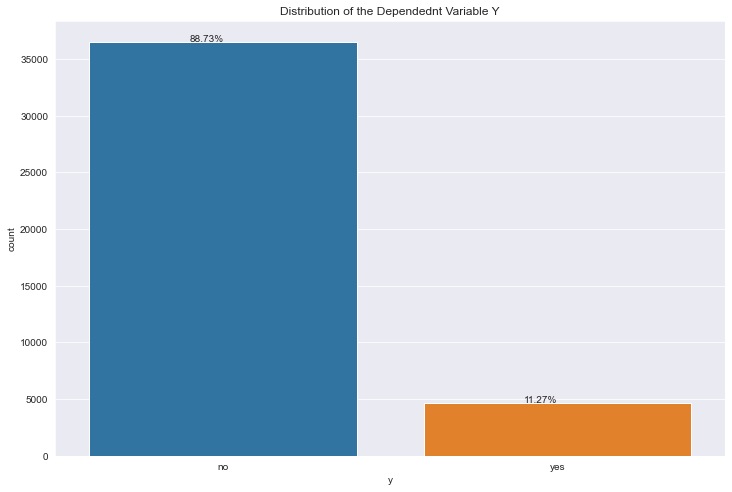

In [43]:
#Analysis of dependent variable y
sns.set_style('darkgrid')
sns.countplot(df['y'])
count_y = round(df['y'].value_counts()['yes']*100/df['y'].value_counts().sum(),2)
count_n = round(df['y'].value_counts()['no']*100/df['y'].value_counts().sum(),2)
plt.text(x=-0.1, y=df['y'].value_counts()['no'] +10, s=str(count_n)+'%')
plt.text(x=0.9, y=df['y'].value_counts()['yes'] +10, s=str(count_y)+'%')
plt.title("Distribution of the Dependednt Variable Y")
plt.show()

<h2> from the above it is clear that the majority of the dependent variable falls under the class NO</h2>

In [45]:
#Analysis of other categorical features
from pandas.api.types import is_string_dtype
cat = []

for i in df:
    if is_string_dtype(df[i]):
        cat.append(i)
print("Categorical columns in the data set are: \n", cat)

    

Categorical columns in the data set are: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


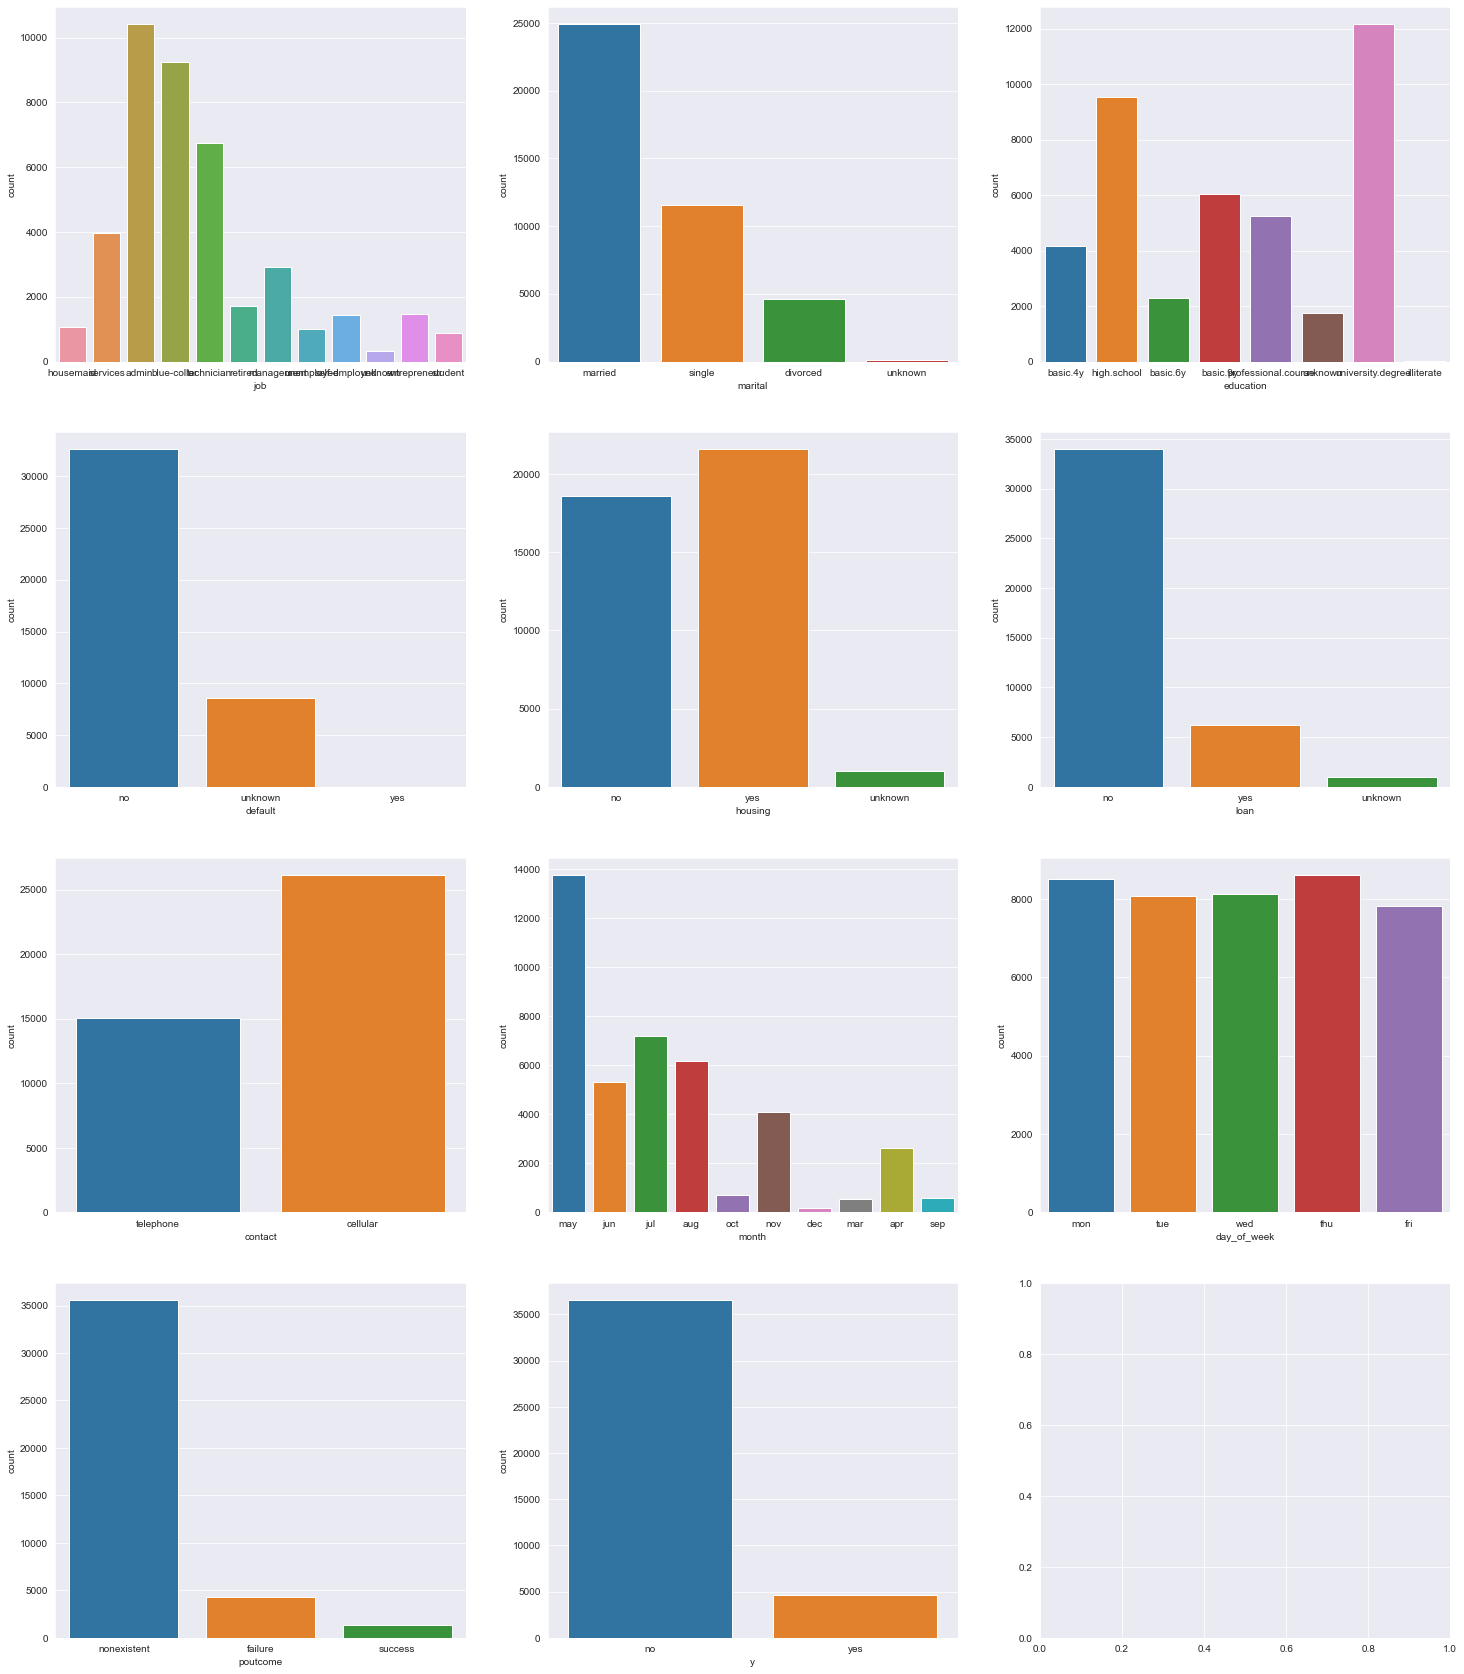

In [68]:
fig , ax = plt.subplots(4,3, figsize=(25,30))
for i, x in zip(cat,ax.flatten()):
    sns.countplot(df[i], ax= x)


<h3> Above is the distribution of each categorical variables</h3>
<h4> Below are the few analysis can be made from the plots</h4>
<li> The Top 3 job categories considered in the marketing campaign are Admin,Bluecollar and technician</li>
<li> 60% of the customers of the overall dataset are married </li>
<li> 86% of the outcome are of type nonexistent</li>
<li> majority of the customers are contacted through cellular</li>

<h3>Q2. Perform the following Exploratory Data Analysis tasks:</h3>
<h2>a. Missing Value Analysis</h2>

<AxesSubplot:>

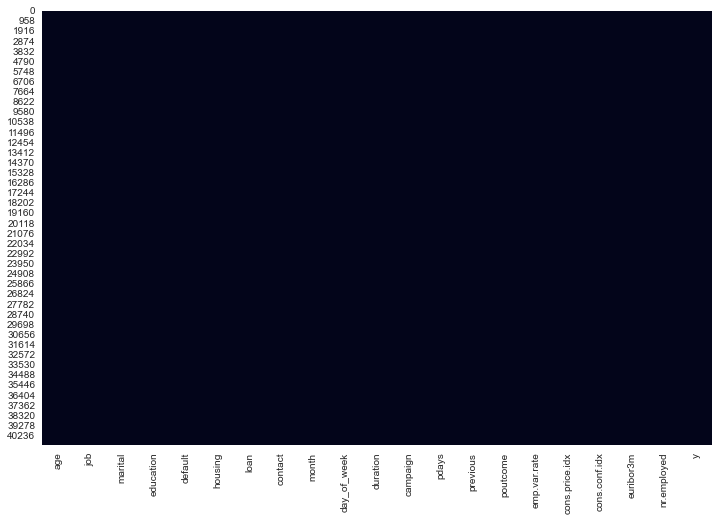

In [70]:
sns.heatmap(df.isnull(), cbar=False)

<h3>#above plot displays that there are no missing data in the dataset</h3>

In [81]:
#below is the code to check if there are any irregular values in the dataset in each column
for i in df.columns:
    print(i, ":", df[i].unique(),"\n")


age : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital : ['married' 'single' 'divorced' 'unknown'] 

education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default : ['no' 'unknown' 'yes'] 

housing : ['no' 'yes' 'unknown'] 

loan : ['no' 'yes' 'unknown'] 

contact : ['telephone' 'cellular'] 

month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri'] 

duration : [ 261  149  226 ... 1246 1556 1868] 

campaign : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 3

<h3>b. Label Encoding wherever required</h3>

<h3><li>Label encoding can be applied for the dependent variable y and contact since there are only 2 classes in these columns</li>
<li>One hot encoding is good for other categorical columns default,housing,loan,marital,day_of_the_week,job,month and poutcome</li></h3>

In [87]:
#Label encoding can be applied for the dependent variable y and contact since there are only 2 classes in these columns
#One hot encoding is good for other categorical columns default,housing,loan,marital,day_of_the_week,job,month and poutcome
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
#label encoding ['y','contact']
df['y'] = lab.fit_transform(df['y'])
df['contact'] = lab.fit_transform(df['contact'])

In [91]:
print("Unique values of contact after label encoding:", df['contact'].unique())
print("Unique values of y after label encoding:", df['y'].unique())
df.dtypes

Unique values of contact after label encoding: [1 0]
Unique values of y after label encoding: [0 1]


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact             int32
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

<h2> it can be noted from the above that the dtype of contact and y is changed</h2>

In [95]:
#one hot encoding for other categorical variables
col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']

df_cater = df.select_dtypes(include='object')
df_numeri = df.select_dtypes(include = np.number)

dummy_encoded_cols = pd.get_dummies(df_cater, drop_first=True)
dummy_encoded_cols

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [113]:
data = pd.concat([df_numeri,dummy_encoded_cols], axis=1)
data.shape

(41188, 54)

In [126]:
data['y'] = data['y'].astype(np.number)
data.head()

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


<h3>c. Selecting important features based on Random Forest</h3>

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop(['y'],axis=1)
Y = pd.DataFrame(data['y'])

X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.3, random_state=10)
clf = RandomForestClassifier()
model = clf.fit(X_train,Y_train)
importances = model.feature_importances_

feat=[]
importance = []
for i in range(len(importances)):
    feat.append(X_train.columns[i])
    importance.append(round(importances[i],2))

In [168]:
features = pd.DataFrame()
features['Feature'] = feat
features['importance'] = importance
features.sort_values(by=['importance'],ascending = False)


,Feature,importance
2,duration,0.29
9,euribor3m,0.10
0,age,0.08
10,nr.employed,0.05
3,campaign,0.04
8,cons.conf.idx,0.03
52,poutcome_success,0.03
4,pdays,0.03
7,cons.price.idx,0.02
6,emp.var.rate,0.02


<h3> among the 53 features only 34 are selected which has high importance</h3>

In [227]:
#only 34 features out of 53 are selected
features_1 = features[features['importance'] >= 0.01]
features_1

,Feature,importance
0,age,0.08
1,contact,0.01
2,duration,0.29
3,campaign,0.04
4,pdays,0.03
5,previous,0.01
6,emp.var.rate,0.02
7,cons.price.idx,0.02
8,cons.conf.idx,0.03
9,euribor3m,0.10


<h2> we can consider the features whose importance are greater than or equal t0 0.01 </h2>

In [183]:
dt1= data.copy(deep=True)
dz = features_1['Feature']
da = dt1[dz]
da.shape
#da is the final data which will be scaled

(41188, 34)

<h2>d. Standardize the data using the anyone of the scalers provided by sklearn</h2>

In [178]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_scaled = sc.fit_transform(da)

In [179]:
dt = pd.DataFrame(data_scaled)

In [233]:
dt['y'] = dt1['y']
dt.head()
dt.shape

(41188, 35)

<h3>Below is the functions for performace metrics</h3>

In [230]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

def test_report(model,y_test,y_predict):
    return(classification_report(y_test,y_predict))

def confu_matrix(model, y_test,y_predict):
    cd = confusion_matrix(y_predict,y_test)
    pa = pd.DataFrame(cd, columns=['Predicted:0','Predicted:1'], index=['Actual:0', 'Actual:1'])
    
    sns.heatmap(pa,annot=True, cbar=True,fmt='d',cmap='RdYlBu')
    plt.show()
    
def roc(model, y_test,y_predict):
    fpr, tpr, threshold = roc_curve(y_test,y_predict)
    
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'r--')
    
    plt.text(x=0.2, y=0.9, s= ("AUC score",round(roc_auc_score(y_test,y_predict),4)))
    
def kappa_score(model,y_test,y_predict):
    return(cohen_kappa_score(y_test,y_predict))
    

<h2> Q4.
Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not</h2>
<h3> will be calling this after each model</h3>

In [207]:
from sklearn import metrics
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

def update_score(model_name,y_test,y_predict):
    global score_card
    
    score_card = score_card.append({
        'Model': model_name,
        'AUC Score': roc_auc_score(y_test,y_predict),
        'Precision Score': metrics.precision_score(y_test,y_predict),
        'Recall Score': metrics.recall_score(y_test,y_predict),
        'Accuracy Score': metrics.accuracy_score(y_test,y_predict),
        'Kappa Score': cohen_kappa_score(y_test,y_predict),
        'f1-score': metrics.f1_score(y_test,y_predict)
        
    }, ignore_index=True)
    return(score_card)

<h3>Q3.Build the following Supervised Learning models:</h3>

<h4>a. Logistic Regression</h4>

In [189]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
X = dt.drop(['y'],axis=1)
X = sm.add_constant(X)
Y = pd.DataFrame(dt['y'])
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.3, random_state=10)
X_train.shape

(28831, 35)

In [190]:
logi = LogisticRegression()
model = logi.fit(X_train,Y_train)

In [204]:
#chooseing standard threshold of 0.5
y_predicted = model.predict(X_test)
y_predicted = ['0' if x <0.5 else '1' for x in y_predicted]
y_predicted = np.array(y_predicted, dtype=np.float32)

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

In [210]:
#calling the metric functions
report = test_report('LogisticRegression',Y_test,y_predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     10935
         1.0       0.66      0.40      0.50      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



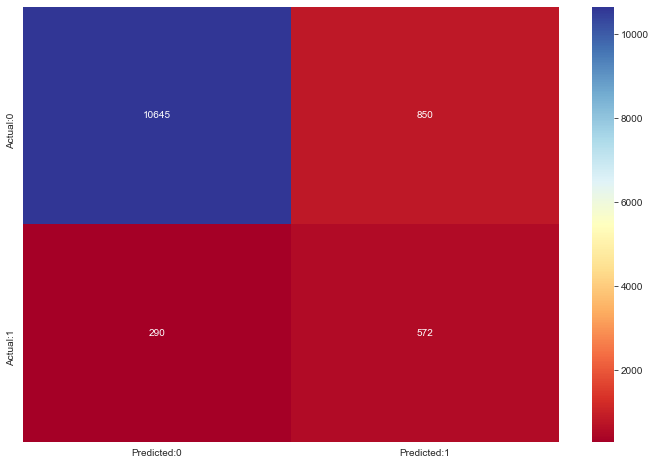

In [231]:
confu_matrix('LogisticRegression',Y_test,y_predicted)

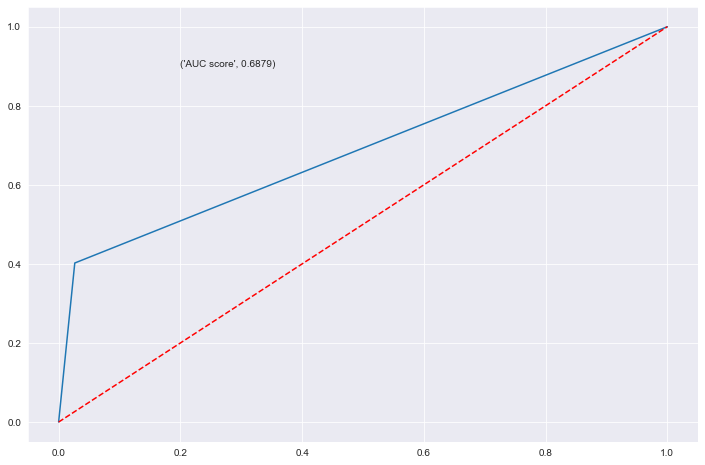

In [216]:
roc('LogisticRegression',Y_test,y_predicted)

In [217]:
update_score('LogisticRegression',Y_test,y_predicted)

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression,0.687865,0.663573,0.40225,0.907745,0.453397,0.500876


<h4>b. SVM </h4>

In [218]:
from sklearn.svm import SVC

In [219]:
sv_classifier = SVC(kernel='linear')
model2 = sv_classifier.fit(X_train,Y_train)

In [222]:
y_svm_predicted = model2.predict(X_test)
y_svm_predicted = ['0' if x <0.5 else '1' for x in y_svm_predicted]
y_svm_predicted = np.array(y_svm_predicted, dtype=np.float32)

In [223]:
#calling the metric functions
report = test_report('SVM',Y_test,y_svm_predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     10935
         1.0       0.65      0.31      0.42      1422

    accuracy                           0.90     12357
   macro avg       0.78      0.64      0.68     12357
weighted avg       0.88      0.90      0.89     12357



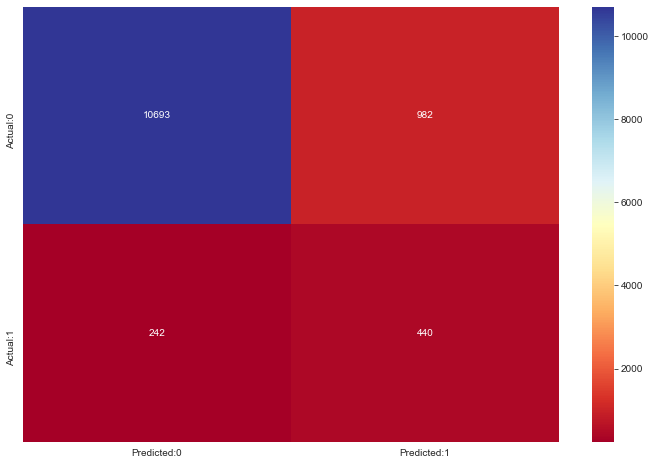

In [232]:
confu_matrix('SVM',Y_test,y_svm_predicted)

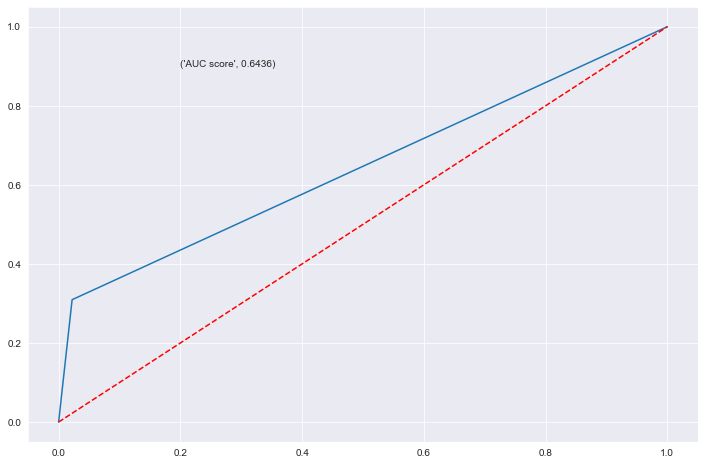

In [225]:
roc('SVM',Y_test,y_svm_predicted)

In [226]:
update_score('SVM',Y_test,y_svm_predicted)

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression,0.687865,0.663573,0.402250,0.907745,0.453397,0.500876
1,SVM,0.643646,0.645161,0.309423,0.900947,0.371352,0.418251


<h2>Conclusion</h2>
<p> by analysing the above metrics table, for the given dataset Logistic Regression is the best fit model. 
    Because it has a Accuracy Score of 90.77% which is higher than that of the SVM classifier.
    Even the AUC Score, precision, recall and f1 score of LogisticRegression portays it as a better model as compared to SVM</p>